In [10]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten

In [2]:
# Fetch Images

In [3]:
dirs = os.listdir('images/')
for dir in dirs:
    dir_path = os.path.join('images', dir)
    if os.path.isdir(dir_path):
        files = os.listdir(dir_path)
        print(dir, len(files))

daisy 764
rose 784
tulip 984
dandelion 1052
sunflower 733


In [4]:
### Load Images into Array as Datasets

In [5]:
base_dir = 'images/'
img_size = 180
batch = 32

In [22]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir, seed = 123, validation_split= 0.2, subset= 'training', batch_size = batch, image_size = (img_size, img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


In [23]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    base_dir, seed = 123, validation_split= 0.2, subset= 'validation', batch_size = batch, image_size = (img_size, img_size))

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [24]:
flower_names = train_ds.class_names
print(flower_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


2025-12-03 13:39:46.505443: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


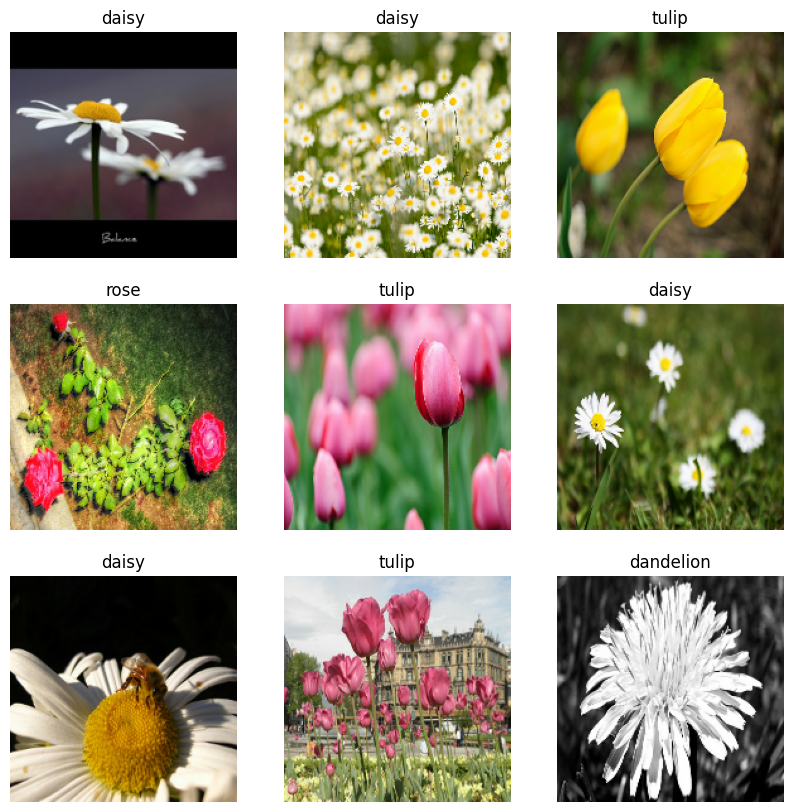

In [30]:
i = 0
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [33]:
AUTOTUNE = tf.data.AUTOTUNE

In [34]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [ ]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [35]:
# Data Augmentation